# Image Processing SS 20 - Assignment - 02

### Deadline is 6.5.2020 at 11:55am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.


Student: Ekaterina Melnikova

# Exercise 1 - 10 Points

Implement affine transformation with [bicubic interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation).
Implement the functions `affine_transformation` and `bicubic_interpolation`. Apply some affine transformation of your choice and smooth the output using your bicubic interpolation.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [3]:
from skimage.data import astronaut
from skimage.color import rgb2gray
import cv2

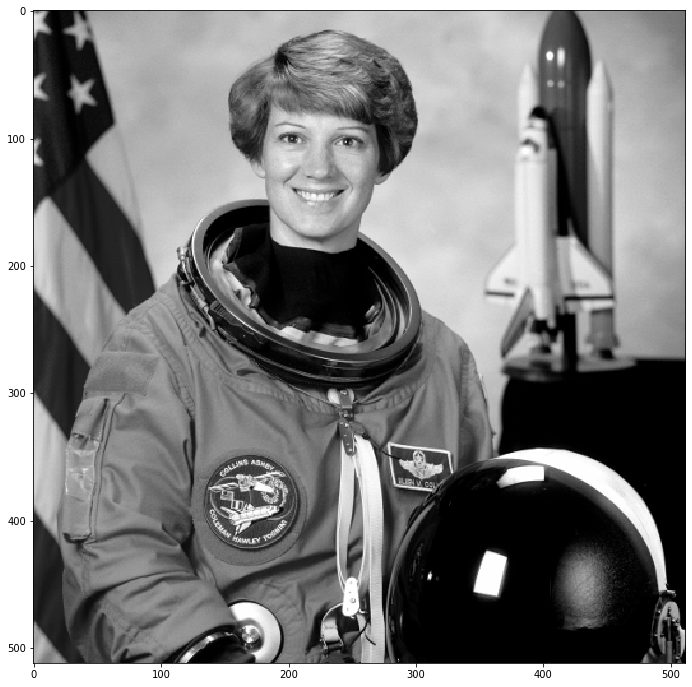

In [4]:
# We use a gray image. All the algorithms should work with color images too.
img = rgb2gray(astronaut() / 255.)
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
def derive_y(image):
    """Computes the derivative of the image w.r.t the y coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if y + 1 < image.shape[1] and y - 1 > 0:
                derived_image[x,y] = (image[x, y + 1] - image[x, y - 1]) / 2.0
    return derived_image

def derive_x(image):
    """Computes the derivative of the image w.r.t the x coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if x + 1 < image.shape[1] and x - 1 > 0:
                derived_image[x,y] = (image[x + 1, y] - image[x - 1, y]) / 2.0
    return derived_image

In [6]:
dx_img = derive_x(img)
dy_img = derive_y(img)

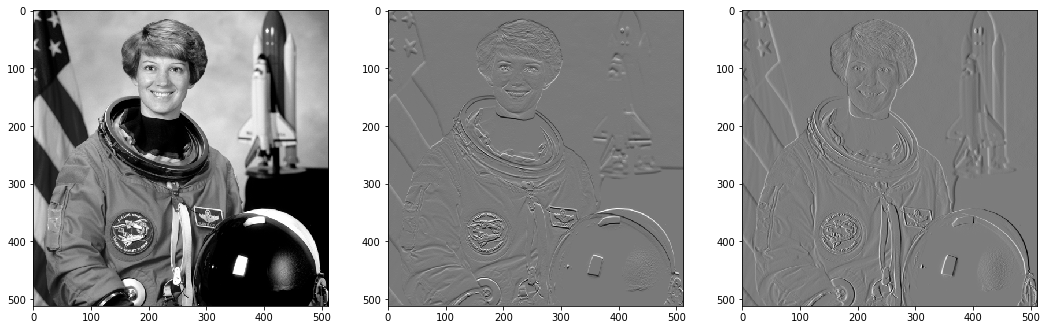

In [7]:
plt.figure(figsize=(18, 12))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.imshow(dx_img, cmap='gray')
plt.subplot(133)
plt.imshow(dy_img, cmap='gray')
plt.show()

Here are some sample affine transformations to be used later on

In [8]:
# Scaling
T_scale = np.array([
    [0.75, 0, 0],
    [0, 0.75, 0],
    [0, 0, 1],
])

In [9]:
# Horizontal Shear
T_affine = np.array([
    [1, 0.3, 0],
    [0, 1, 0],
    [0, 0, 1],
])

In [10]:
# you can use this function to invert the matricies
np.linalg.inv(T_scale)

array([[1.33333333, 0.        , 0.        ],
       [0.        , 1.33333333, 0.        ],
       [0.        , 0.        , 1.        ]])

In [11]:
def bicubic_interpolation(img):
    #dx_img = derive_x(img)
    #dy_img = derive_y(img)
    #dxy_img = derive_x(dy_img)
    bicubic_img = cv2.resize(img, None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
    return bicubic_img

In [12]:
def affine_transformation(img, matrix):
    new_img = np.zeros((np.shape(img)[0]+200, np.shape(img)[1]+200))
    for i in range(np.shape(img)[0]):
        for j in range(np.shape(img)[1]):
            a = np.array([i, j, 1])
            xy_new = matrix.dot(a)
            new_img[int(xy_new[0])][int(xy_new[1])] = img[i][j]
    
    new_img = bicubic_interpolation(new_img)
    return new_img

In [13]:
img_scale = affine_transformation(img, T_scale)
img_affine = affine_transformation(img, T_affine)

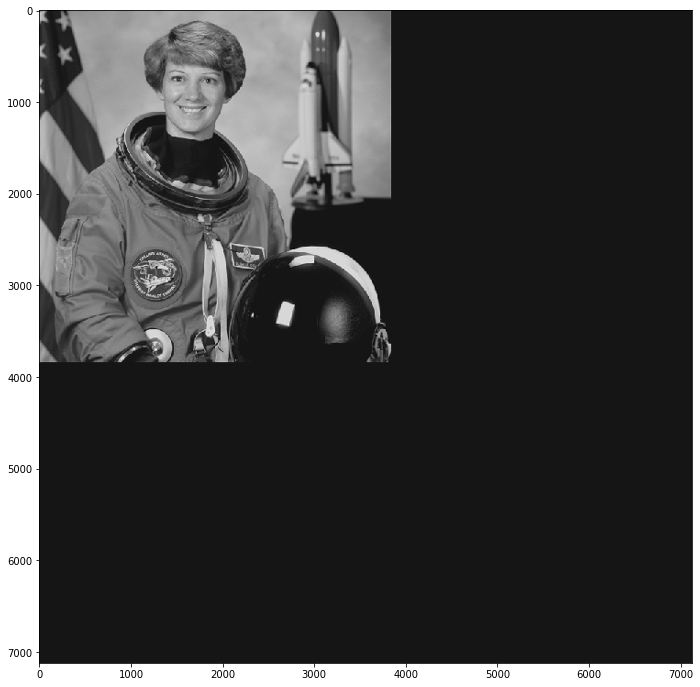

In [14]:
plt.imshow(img_scale, cmap='gray')
plt.show()

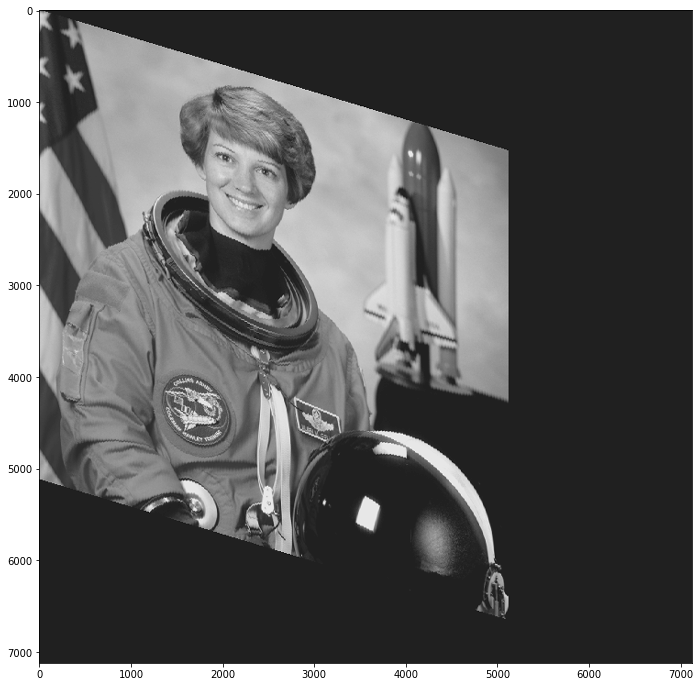

In [15]:
plt.imshow(img_affine, cmap='gray')
plt.show()